In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels)=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')

In [5]:
train_images=train_images.reshape(60000,28,28,1)

In [6]:
train_images=train_images/255.0
train_images.shape

(60000, 28, 28, 1)

In [7]:
test_images=test_images.reshape(10000,28,28,1)/255.0

In [8]:
test_images.shape

(10000, 28, 28, 1)

In [9]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.50),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history=model.fit(train_images,train_labels, epochs=14, validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/14
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.4827 - accuracy: 0.8223 - val_loss: 0.3529 - val_accuracy: 0.8707
Epoch 2/14
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.3346 - accuracy: 0.8761 - val_loss: 0.2966 - val_accuracy: 0.8886
Epoch 3/14
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.2946 - accuracy: 0.8895 - val_loss: 0.2854 - val_accuracy: 0.8944
Epoch 4/14
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.2673 - accuracy: 0.9003 - val_loss: 0.2622 - val_accuracy: 0.9034
Epoch 5/14
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.2489 - accuracy: 0.9071 - val_loss: 0.2657 - val_accuracy: 0.9046
Epoch 6/14
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.2329 - accuracy: 0.9127 - val_loss: 0.2406 - val_accuracy: 0.9126
Epoch 7/14
60000/60000 [==============================] 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               8

In [13]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 245us/sample - loss: 0.2348 - accuracy: 0.9192


[0.23479233056902885, 0.9192]

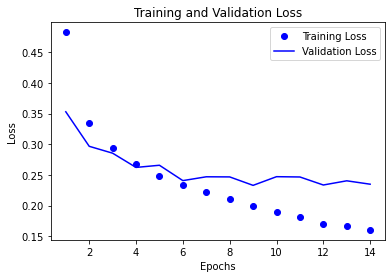

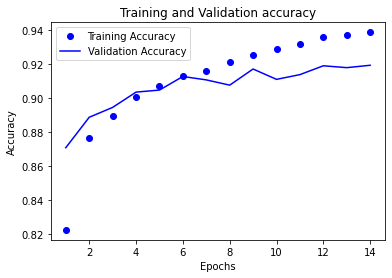

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
history_dict=history.history

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.clf()

In [15]:
y_predict=model.predict(test_images)

In [16]:
print(y_predict)

[[2.4188313e-07 2.4320675e-08 1.1472219e-09 ... 5.8171074e-05
  3.5427823e-09 9.9966204e-01]
 [5.4726837e-07 7.1436352e-13 9.9995410e-01 ... 2.7478278e-15
  9.5007069e-10 1.8824140e-11]
 [1.0330866e-22 1.0000000e+00 4.3189175e-23 ... 0.0000000e+00
  1.3202295e-22 4.6162502e-38]
 ...
 [3.1343227e-17 2.7700564e-22 8.9499625e-17 ... 2.2495684e-21
  1.0000000e+00 1.1932298e-20]
 [2.3431771e-14 1.0000000e+00 3.8915428e-13 ... 3.9624736e-24
  6.4161912e-17 5.8356206e-23]
 [5.1066971e-05 3.6651058e-09 4.4788353e-06 ... 1.7373422e-02
  1.0448153e-03 9.1771384e-05]]


In [22]:
from keras.models import load_model

model.save('mnist.h5')  # creates a HDF5 file 'my_model.h5'
